## Задание 6.3

Попробуйте откластеризовать пассажиров Титаника на несколько кластеров (3-5-7-10), предварительно отшкалируйте данные. Проанализируйте результаты: 
* Посмотрите на объекты лежащие в одном кластере, можете ли вы сформулировать словестное описание этих объектов (Например в один кластер могли попасть женщины в возрасте до 20 лет, плывшие во 2 и 3 классе).
* Полученные метки кластеров вы можете использовать в качестве новых признаков (предварительно их следует обработать)


In [20]:
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import process_titanic_features
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [10]:
path='./day5/titanic/'
train = pd.read_csv('{}train.csv'.format(path), index_col=0)
X, _, _ = process_titanic_features(train)
X = X.drop('Survived', axis=1).values

/home/care1e55/progz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/storage/Study/DBO/ml/utils.py:58: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  df[['Name_len', 'Age', 'Fare']] = scaler.transform(df[['Name_len', 'Age', 'Fare']])


In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [12]:
scaled_X

array([[-0.73769513, -0.59473226,  0.43279337, ..., -0.56568542,
        -0.51015154,  0.90258736],
       [ 1.35557354,  0.63531868,  0.43279337, ...,  1.76776695,
        -0.51015154, -1.10792599],
       [ 1.35557354, -0.28721953, -0.4745452 , ..., -0.56568542,
        -0.51015154,  0.90258736],
       ...,
       [ 1.35557354, -0.13994331,  0.43279337, ..., -0.56568542,
        -0.51015154,  0.90258736],
       [-0.73769513, -0.28721953, -0.4745452 , ...,  1.76776695,
        -0.51015154, -1.10792599],
       [-0.73769513,  0.17404958, -0.4745452 , ..., -0.56568542,
        -0.51015154,  0.90258736]])

In [16]:
# Посмотрим на данные
pca = PCA(2)
PCA_X = pca.fit_transform(scaled_X)

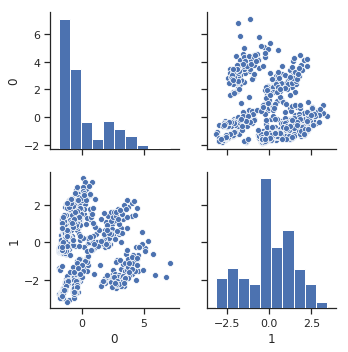

In [17]:
g = sns.pairplot(pd.DataFrame(PCA_X))

In [21]:
# Ну, примерно можно выделить 4-5 групп
kmeans = KMeans(n_clusters=5)
kmeans.fit(PCA_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

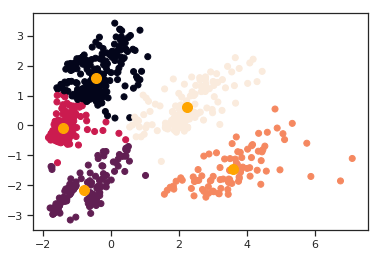

In [22]:
plt.scatter(PCA_X[:, 0], PCA_X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], s=100, c='orange');

In [23]:
# Применим кминс на исходные отшкалированные данные
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
train["kmeans_labels"] = kmeans.labels_

In [25]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,is_Cabin,kmeans_labels
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,23,0,4
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,51,1,3
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0,4


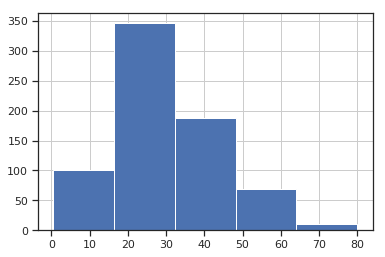

In [26]:
train["Age"].hist(bins=5)

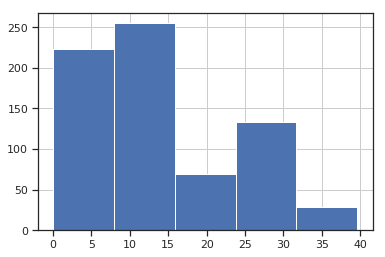

In [27]:
train[train.Fare < train.Fare.quantile(0.8)]["Fare"].hist(bins=5)

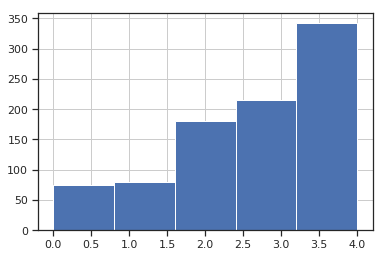

In [28]:
train["kmeans_labels"].hist(bins=5)

In [ ]:
# Интерпретировать тяжело, но видно, что не безнадежно.



## Задание 6.4. 

Реализовать алгоритм k-means

In [29]:
import math
from sklearn.datasets import make_multilabel_classification

In [30]:
X, y = make_blobs(random_state=33)

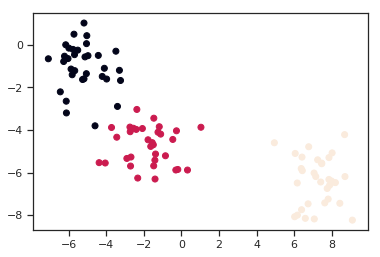

In [31]:
   plt.scatter(X[:, 0], X[:, 1], c=y);

In [32]:
class myKmeans():
    
    
    def __init__(self):
        self.centroids = []
        self.preds = []
        pass
    
    
    def distance(self, a, b):
        return np.linalg.norm(a - b)
    
    
    def fit(self, X, k=3, epsilon=0.1):
        self.gen_rand_centroids(X,k)
        pred_centroids = np.zeros((k,2))
        while(self.distance(self.centroids,pred_centroids) > epsilon):
            pred_centroids = self.centroids
            result = self.calc_nearest(k)
            self.recalc_centroids(result)
            
             
    def calc_nearest(self, k):
        result = []
        for nclass, point in enumerate(self.centroids):
            distances = []
            for index in range(len(X)):
                dist = self.distance(point, X[index])
                distances.append((list(X[index]), dist))
            distances.sort(key=lambda x: x[1])
            neighbors = distances[:int(len(X)/k)]
            result.append(np.array(neighbors)[:,0])
        return np.array(result)

    
    def recalc_centroids(self, result):
        counter = 0
        for i in result:
            new_x1 = np.array(list(i))[:,0].mean()
            new_x2 = np.array(list(i))[:,1].mean()
            self.centroids[counter][0] = new_x1
            self.centroids[counter][1] = new_x2
            self.centroids = np.array(self.centroids)
            counter += 1
        
        
    def gen_rand_centroids(self, X, k):
        for i in range(k):
            rand_x1 = int(np.random.randint(X[:,0].min(),X[:,0].max(),1))
            rand_x2 = int(np.random.randint(X[:,1].min(),X[:,1].max(),1))
            self.centroids.append([rand_x1, rand_x2])



In [77]:
kmeans = myKmeans()
kmeans.fit(X)

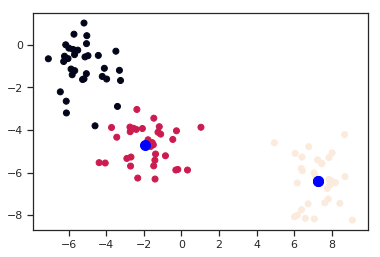

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y);
plt.scatter(np.array(kmeans.centroids)[:, 0],
            np.array(kmeans.centroids)[:, 1], s=100, c='blue');

In [ ]:
# Недостатки реализации алгоритма:
# 1. Чувствительность к начальной инициализации весов, 
# всвязи с этим центройды могут накладываться друг на друга
# 2. Не реализован метод predict и не проставлены метки классов для выборки,
# передаваемой в fit